In [1]:
using Quantumoptics
using PyPlot

In [2]:
# Parameters
N_cutoff = 10

ωc = 0.1
ωa = 0.1
Ω = 1.;

In [3]:
# Bases
b_fock = FockBasis(N_cutoff)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin;

In [4]:
# Fundamental operators
a = destroy(b_fock)
at = create(b_fock)
n = number(b_fock)

sm = sigmam(b_spin)
sp = sigmap(b_spin)
sz = sigmaz(b_spin)

# Hamiltonian
Hatom = ωa*sz/2
Hfield = ωc*n
Hint = Ω*(at⊗sm + a⊗sp)
H = identity(b_fock)⊗Hatom + Hfield⊗identity(b_spin) + Hint;

In [5]:
# Initial state
α = 1.
Ψ0 = coherentstate(b_fock, α) ⊗ spindown(b_spin)

# Integration time
T = [0:0.1:20;];

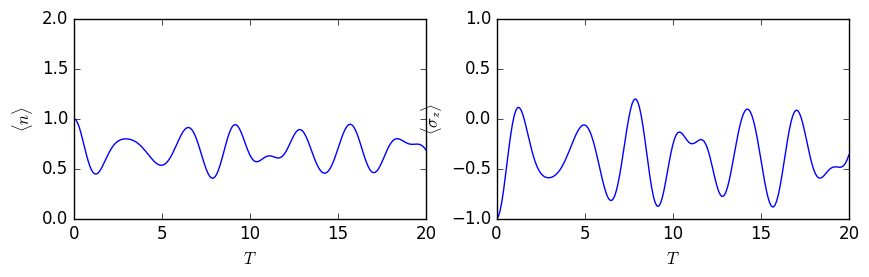

In [6]:
# Schroedinger time evolution
tout, Ψt = timeevolution.schroedinger(T, Ψ0, H)

exp_n = expect(n ⊗ identity(b_spin), Ψt)
exp_sz = expect(identity(b_fock) ⊗ sz, Ψt)

figure(figsize=(10,2.5))
subplot(1,2,1)
ylim([0, 2])
plot(T, exp_n);
xlabel(L"T")
ylabel(L"\langle n \rangle")

subplot(1,2,2)
ylim([-1, 1])
plot(T, exp_sz);
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle");

In [7]:
# Jump operators
γ = 0.5
J = [sqrt(γ)*identity(b_fock) ⊗ sm];

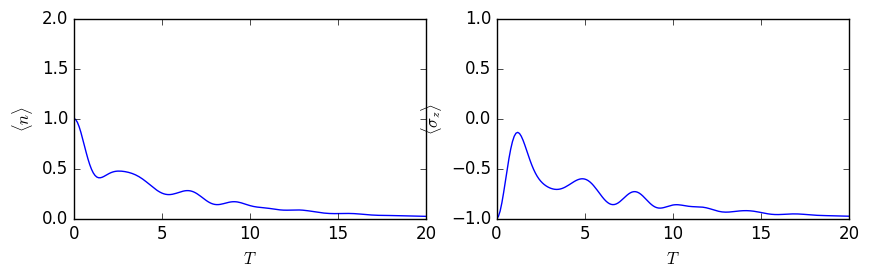

In [8]:
# Master
tout, ρt = timeevolution.master(T, Ψ0, H, J)
exp_n_master = expect(n ⊗ identity(b_spin), ρt)
exp_sz_master = expect(identity(b_fock) ⊗ sz, ρt)

figure(figsize=(10,2.5))
subplot(1,2,1)
ylim([0, 2])
plot(T, exp_n_master);
xlabel(L"T")
ylabel(L"\langle n \rangle")

subplot(1,2,2)
ylim([-1, 1])
plot(T, exp_sz_master);
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle");

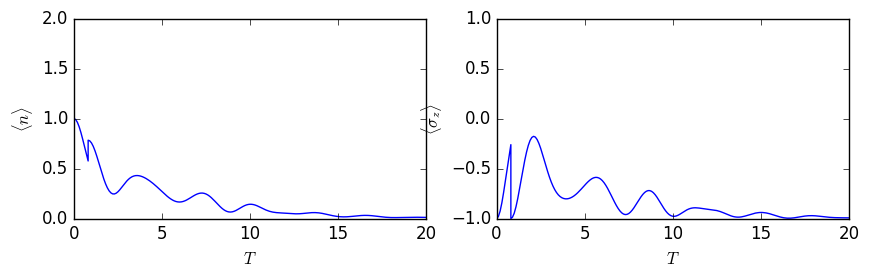

In [9]:
# Monte Carlo wave function
tout, Ψt = timeevolution.mcwf(T, Ψ0, H, J, display_beforeevent=true, display_afterevent=true)
exp_n = expect(n ⊗ identity(b_spin), Ψt)
exp_sz = expect(identity(b_fock) ⊗ sz, Ψt)

figure(figsize=(10,2.5))
subplot(1,2,1)
ylim([0, 2])
plot(tout, exp_n)
xlabel(L"T")
ylabel(L"\langle n \rangle")

subplot(1,2,2)
ylim([-1, 1])
plot(tout, exp_sz)
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle");

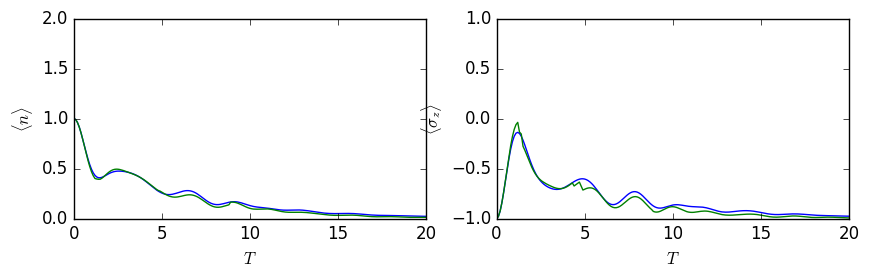

In [10]:
# Convergence of MCWF against master equation
Ntrajectories = 10
exp_n_average = zeros(Float64, length(T))
exp_sz_average = zeros(Float64, length(T))

for N = 1:Ntrajectories
    tout, Ψt = timeevolution.mcwf(T, Ψ0, H, J)
    exp_n_average += expect(n ⊗ identity(b_spin), Ψt)
    exp_sz_average += expect(identity(b_fock) ⊗ sz, Ψt)
end

exp_n_average /= Ntrajectories
exp_sz_average /= Ntrajectories

figure(figsize=(10,2.5))
subplot(1,2,1)
ylim([0, 2])
plot(T, exp_n_master)
plot(T, exp_n_average)
xlabel(L"T")
ylabel(L"\langle n \rangle")

subplot(1,2,2)
ylim([-1, 1])
plot(T, exp_sz_master)
plot(T, exp_sz_average)
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle");